## Gradient Descent 
Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved using calculus, taking steps in the negative direction of the function gradient.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('train.csv')

In [32]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
x = df['GrLivArea']
y = df['SalePrice']

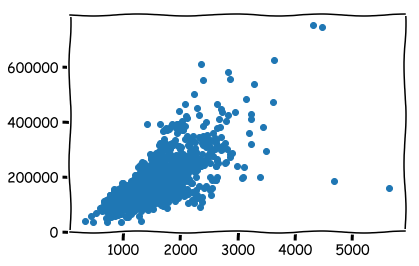

In [35]:
plt.scatter(x, y)
plt.show()

In [36]:
df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [37]:
df.drop([523, 1298], inplace = True)
df.reset_index(inplace = True)

In [38]:
x = df['GrLivArea']
y = df['SalePrice']

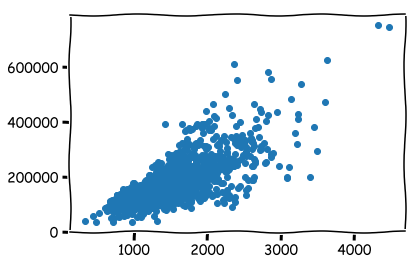

In [39]:
plt.scatter(x, y)
plt.show()

In [40]:
my_slope = 0
my_intercept = 0

In [41]:
def regression_formula(x, slope, intercept):
    return slope * x + intercept

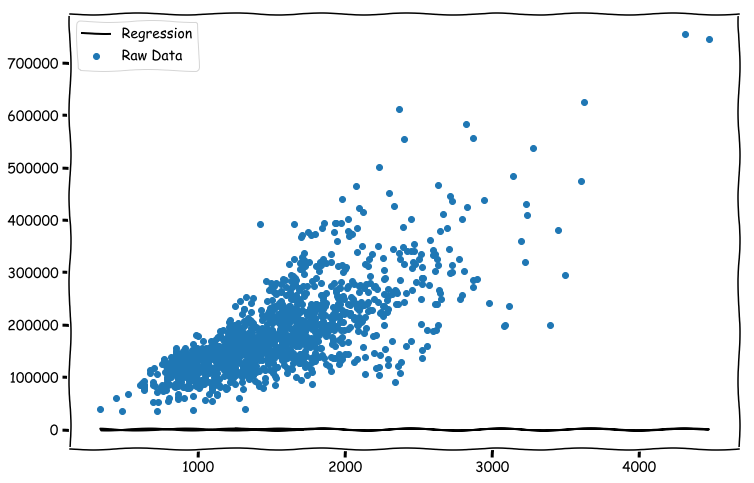

In [42]:
plt.xkcd()
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, my_slope, my_intercept), color = 'k', label = 'Regression')
plt.legend()
plt.show()

In [43]:
def error(intercept, slope, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (slope * x[i] + intercept)) ** 2
    return totalError / len(x)

In [44]:
error(my_intercept, my_slope, x, y)

39051850679.587105

![title](linear_regression_error1.png)

![title](gradient_descent_error_surface.png)

![title](partial_derives.png)

In [46]:
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = 0
    m_gradient = 0 
    N = len(x)
    for i in range(0, len(x)):
        m_gradient +=  -(2/N) * x[i] * (y[i] - (m_current * x[i] + b_current))
        b_gradient +=  -(2/N) * (y[i] - (m_current * x[i] + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    
    return (new_b, new_m)

In [48]:
first_step = step_gradient(my_intercept, my_slope, x, y, learning_rate=0.1)

In [50]:
first_step

(36186.583813443016, 60589219.39890255)

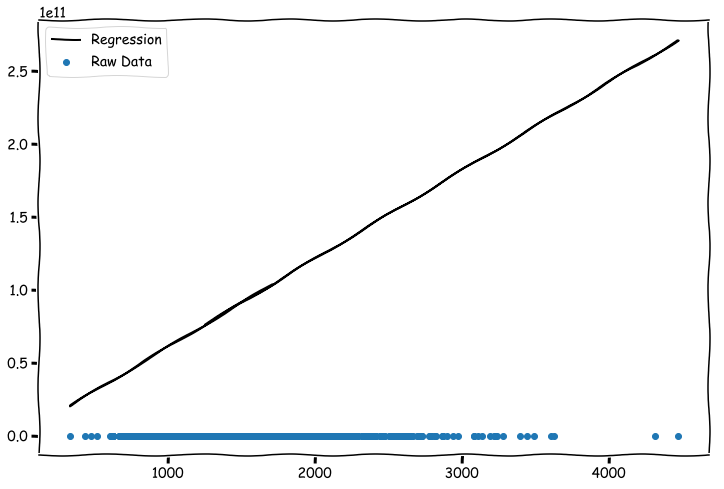

In [49]:
plt.xkcd()
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, first_step[1], first_step[0]), 
         color = 'k', label = 'Regression')
plt.legend()
plt.show()

In [51]:
error(my_intercept, my_slope, x, y)

39051850679.587105

In [52]:
error(first_step[0], first_step[1], x, y)

9.32176710829251e+21

In [63]:
first_step = step_gradient(my_intercept, my_slope, x, y, learning_rate=0.00000001)

error(first_step[0], first_step[1], x, y)

35474013900.93792

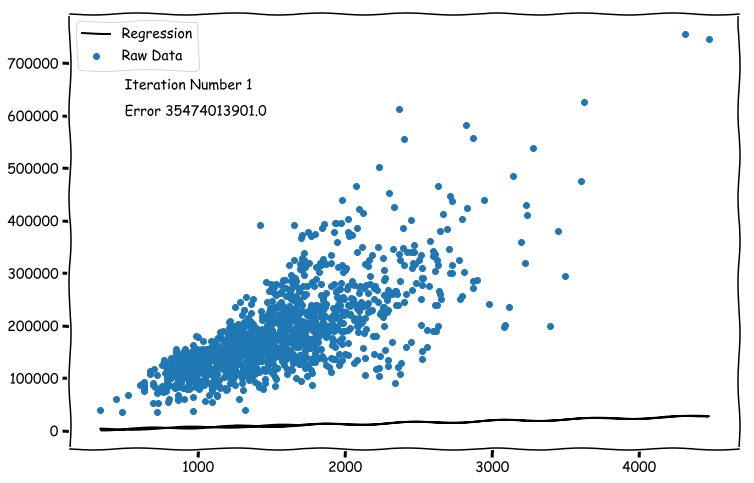

In [67]:
plt.xkcd()
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, first_step[1], first_step[0]), 
         color = 'k', label = 'Regression')
plt.legend()
plt.text(500, 650000, 'Iteration Number 1')
plt.text(500, 600000, f'Error {round(error(first_step[0], first_step[1], x, y), 0)}')
plt.show()

## Iteration Number 2

In [68]:
second_step = step_gradient(first_step[0], first_step[1], x, y, learning_rate=0.00000001)

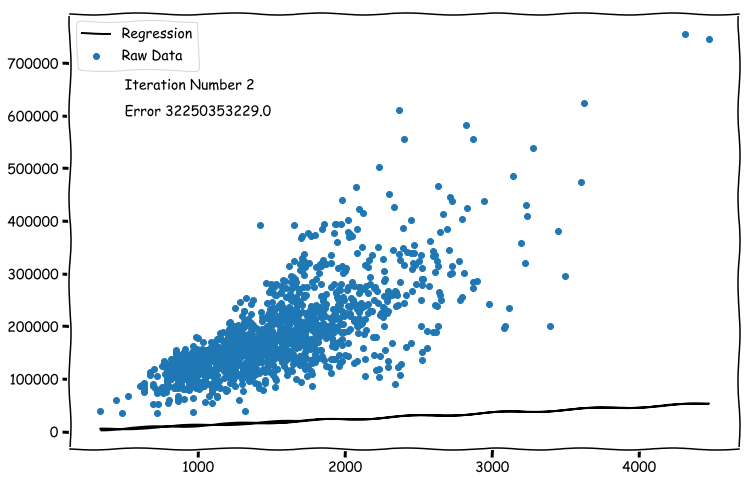

In [69]:
plt.xkcd()
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, second_step[1], second_step[0]), 
         color = 'k', label = 'Regression')
plt.legend()
plt.text(500, 650000, 'Iteration Number 2')
plt.text(500, 600000, f'Error {round(error(second_step[0], second_step[1], x, y), 0)}')
plt.show()

## Iteration Number 3

In [70]:
third_step = step_gradient(second_step[0], second_step[1], x, y, learning_rate=0.00000001)

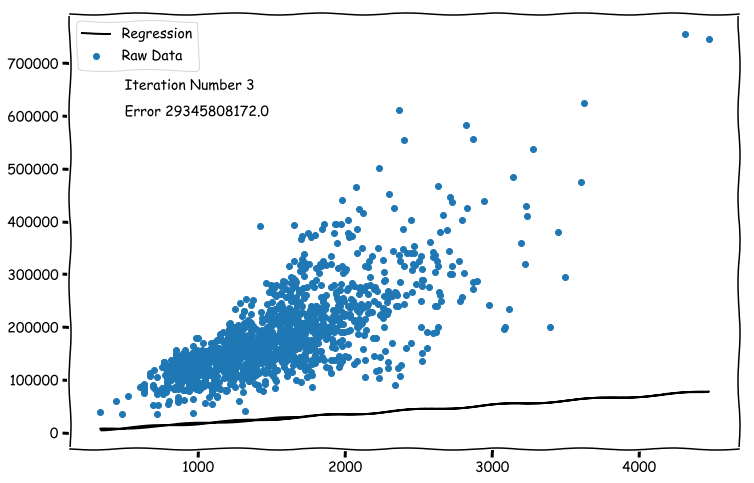

In [71]:
plt.xkcd()
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, third_step[1], third_step[0]), 
         color = 'k', label = 'Regression')
plt.legend()
plt.text(500, 650000, 'Iteration Number 3')
plt.text(500, 600000, f'Error {round(error(third_step[0], third_step[1], x, y), 0)}')
plt.show()

In [85]:
%%time
errs = []
b = 0
m = 0

for i in range(100):
    err = error(b, m, x, y)
    errs.append(err)
    b, m = step_gradient(b, m, x, y, 0.00000001)
    if len(errs) > 1:
        if (errs[-2] - errs[-1]) / errs[-2] < 0.01:
            print (i)
            break

47
CPU times: user 5.74 s, sys: 52.5 ms, total: 5.79 s
Wall time: 5.87 s


In [87]:
%%time
errs = []
b = 0
m = 0

for i in range(100):
    err = error(b, m, x, y)
    errs.append(err)
    b, m = step_gradient(b, m, x, y, 0.00000001)

CPU times: user 11.8 s, sys: 80.3 ms, total: 11.9 s
Wall time: 12 s


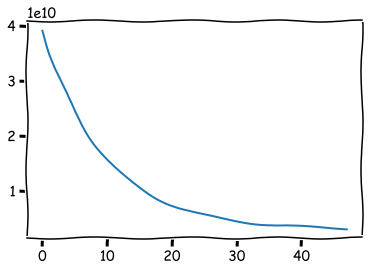

In [84]:
plt.plot(range(48), errs)
plt.show()

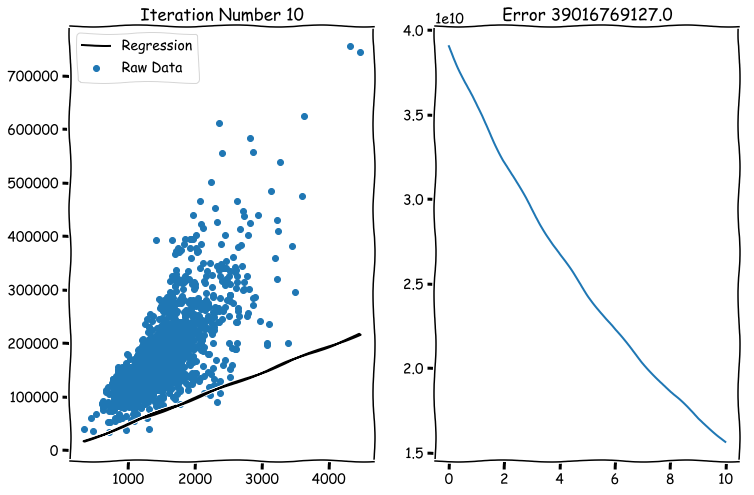

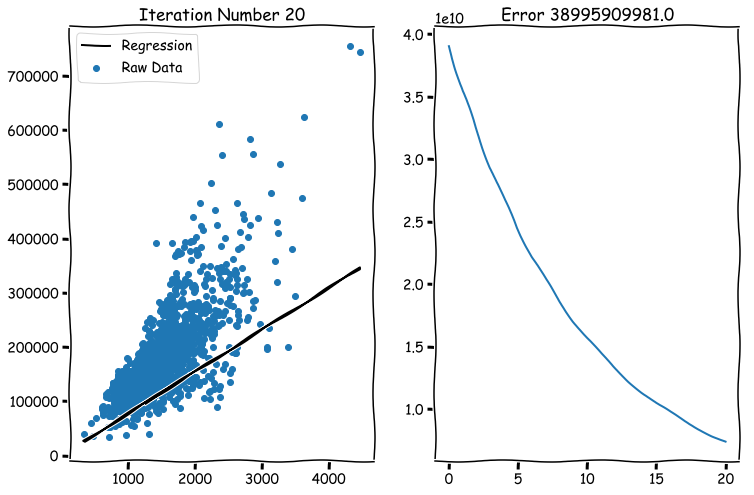

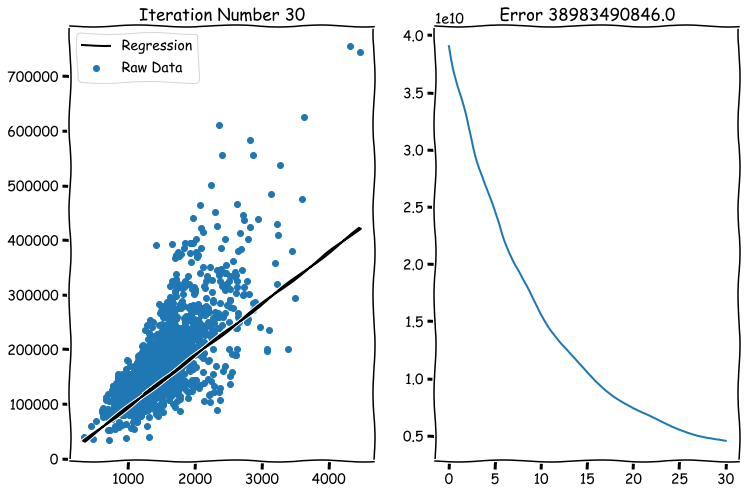

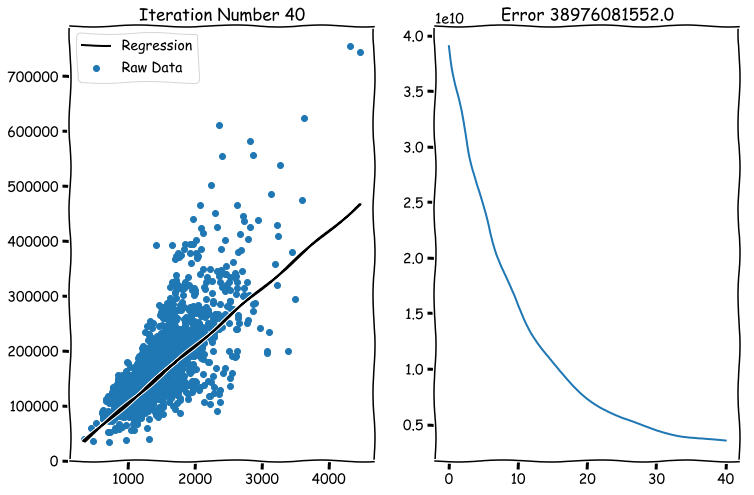

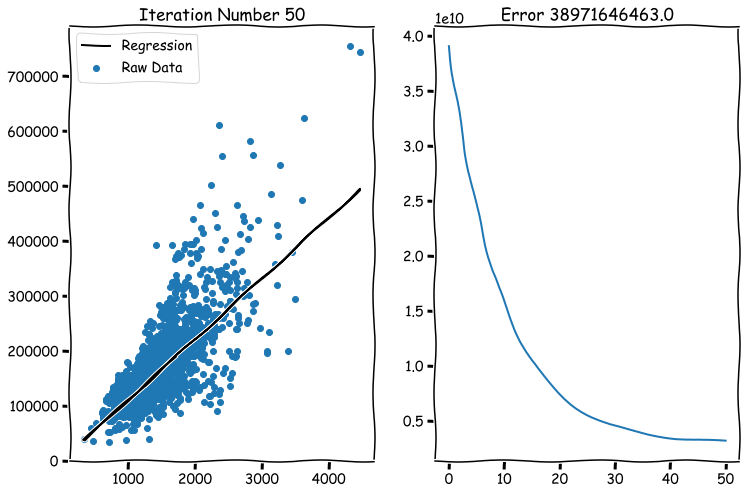

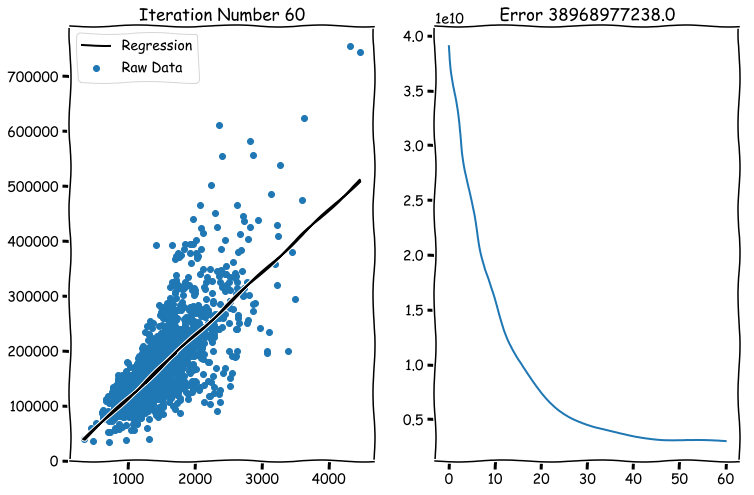

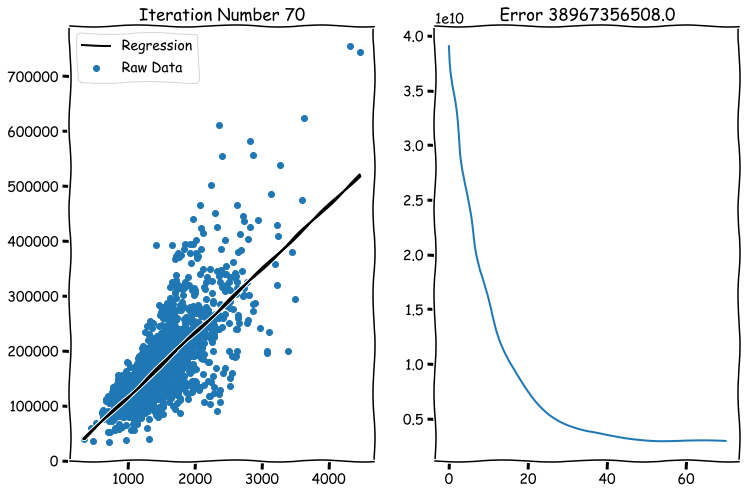

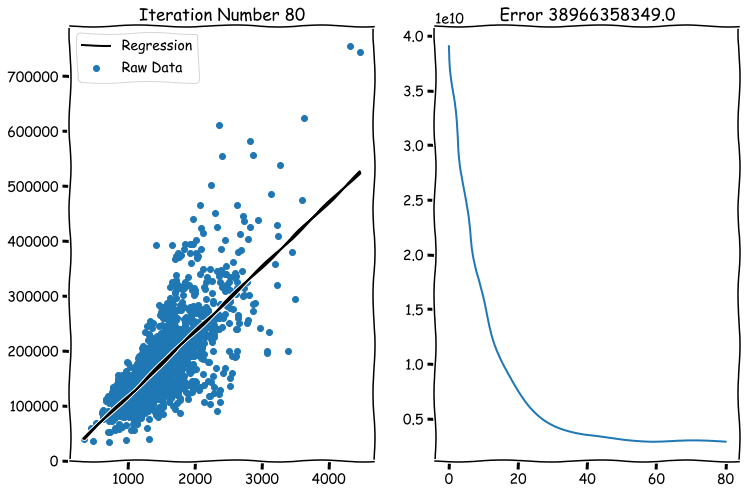

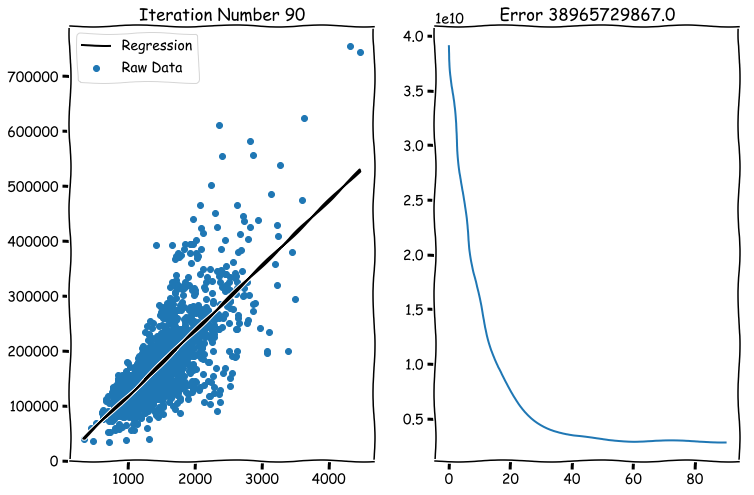

In [91]:
errs = []
b = 0
m = 0

for i in range(100):
    err = error(b, m, x, y)
    errs.append(err)
    if (i > 1) & (i % 10 == 0):
        plt.xkcd()
        fig = plt.figure(figsize = (12, 8))
        ax1 = plt.subplot(1, 2, 1)
        ax1.scatter(x, y, label = 'Raw Data')
        ax1.plot(x, regression_formula(x, m, b), 
                 color = 'k', label = 'Regression')
        plt.legend()
        ax1.set_title(f'Iteration Number {i}')
        ax2 = plt.subplot(1, 2, 2)
        ax2.plot(range(i + 1), errs)
        ax2.set_title(f'Error {round(error(m, b, x, y), 0)}')
        plt.show()
    b, m = step_gradient(b, m, x, y, 0.00000001)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
linreg = LinearRegression()

In [97]:
linreg.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
linreg.coef_[0][0]

115.03998299377375

In [102]:
linreg.intercept_[0]

7168.969884852384

In [103]:
m, b

(118.65407390914588, 0.07203592252718763)

Text(0.5, 1.0, 'Sklearn')

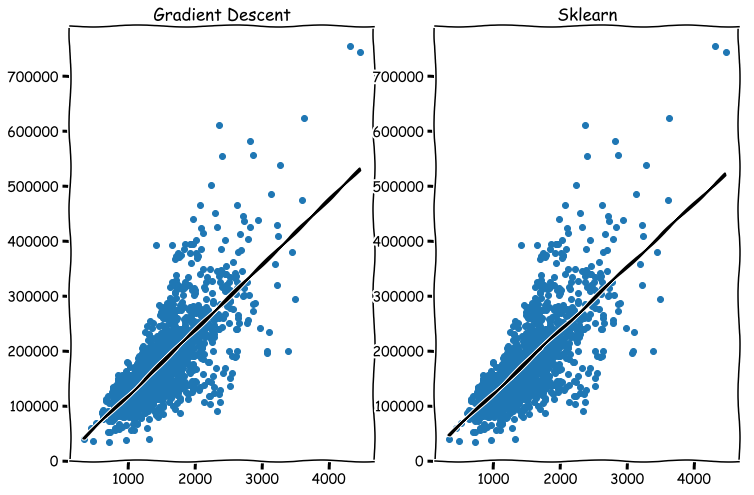

In [107]:
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.scatter(x, y, label = 'Raw Data')
ax1.plot(x, regression_formula(x, m, b), 
         color = 'k', label = 'Regression')
ax1.set_title('Gradient Descent')
ax2.scatter(x, y, label = 'Raw Data')
ax2.plot(x, regression_formula(x, linreg.coef_[0][0], linreg.intercept_[0]), 
         color = 'k', label = 'Regression')
ax2.set_title('Sklearn')

In [113]:
b

0.07203592252718763

In [110]:
np.sqrt(error(m, b, x, y))

197396.3548220136

In [112]:
np.sqrt(error(linreg.coef_[0][0], linreg.intercept_[0], x, y))

11233942.558970327

In [ ]:
error(m, b, x, y)